### Do your imports!

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [2]:
df = pd.read_csv('subset.csv', nrows=5000000)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'address_type', 'city', 'status', 'borough',
       'open_data_channel_type'],
      dtype='object')

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [5]:
df.dtypes

unique_key                 int64
created_date              object
closed_date               object
agency                    object
agency_name               object
complaint_type            object
descriptor                object
location_type             object
incident_zip              object
incident_address          object
address_type              object
city                      object
status                    object
borough                   object
open_data_channel_type    object
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [6]:
df.created_date = pd.to_datetime(df.created_date, format="%m/%d/%Y %I:%M:%S %p")

In [7]:
df.closed_date = pd.to_datetime(df.closed_date, format="%m/%d/%Y %I:%M:%S %p")

In [8]:
df.dtypes

unique_key                         int64
created_date              datetime64[ns]
closed_date               datetime64[ns]
agency                            object
agency_name                       object
complaint_type                    object
descriptor                        object
location_type                     object
incident_zip                      object
incident_address                  object
address_type                      object
city                              object
status                            object
borough                           object
open_data_channel_type            object
dtype: object

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [9]:
df.created_date.dt.strftime('%m').value_counts()

03    550088
01    530121
04    522149
05    497923
02    455684
06    406593
11    369448
12    360041
10    350836
08    343256
09    323474
07    290387
Name: created_date, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [10]:
df['month_year'] = df.created_date.dt.strftime('%y-%m')
df.month_year.value_counts().head(5)

19-05    213308
19-03    198605
19-04    190354
19-06    131914
14-01    122729
Name: month_year, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

<AxesSubplot:>

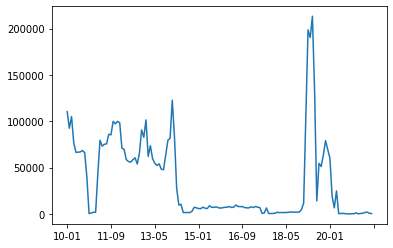

In [11]:
df.month_year.value_counts().sort_index().plot()
# my chart already started from 0! so I didn't use ylim here

## What time of day (by hour) is the most least for 311 complains? The most common?


In [12]:
df.created_date.dt.strftime('%I %p').value_counts()

12 AM    2298283
10 AM     237014
11 AM     228757
02 PM     223131
09 AM     211975
01 PM     201759
12 PM     195868
03 PM     189451
04 PM     155805
08 AM     153829
05 PM     119699
07 PM     109025
06 PM     107527
07 AM      93122
08 PM      89771
09 PM      87220
10 PM      81684
11 PM      65856
06 AM      42243
01 AM      32372
02 AM      24023
05 AM      19734
03 AM      16288
04 AM      15564
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:title={'center':'NY 311 Calls Per Hour'}>

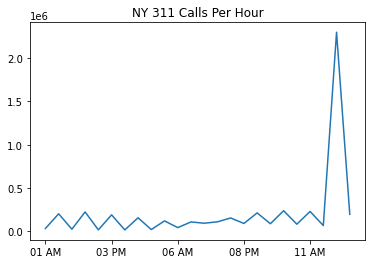

In [13]:
df.created_date.dt.strftime('%I %p').value_counts().sort_index().plot(title='NY 311 Calls Per Hour')

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [14]:
df.agency.value_counts().head(5)

HPD     2647612
DOT      694898
DSNY     565296
DOB      354274
NYPD     292550
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [15]:
df.agency_name.value_counts().head(6)

# NYPD - New York City Police Department
# HPD - Department of Housing Preservation and Development
# DOT - Department of Transportation
# DSNY - Department of Sanitation
# DEP - Department of Environmental Protection

Department of Housing Preservation and Development    2647451
Department of Transportation                           694897
Department of Buildings                                354259
New York City Police Department                        292098
Department of Environmental Protection                 238188
Department of Sanitation                               114293
Name: agency_name, dtype: int64

## What is the most common complaint to HPD?

In [16]:
df[df.agency == 'HPD'].complaint_type.value_counts().head(5)

HEATING                 696677
GENERAL CONSTRUCTION    442701
PLUMBING                397379
PAINT - PLASTER         319733
NONCONST                229417
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [17]:
df.groupby('agency').complaint_type.value_counts().groupby(level=0).head(3)

agency  complaint_type                           
3-1-1   Noise Survey                                     31
        Benefit Card Replacement                          2
        City Vehicle Placard Complaint                    2
ACS     Forms                                           123
COIB    Forms                                             4
DCA     Consumer Complaint                             6869
        DCA / DOH New License Application Request      2434
DCAS    Question                                        261
        Comments                                         19
DCP     Research Questions                                9
DEP     Water System                                  80197
        Noise                                         67976
        Sewer                                         57304
DFTA    Housing - Low Income Senior                    1764
        Elder Abuse                                     635
        Housing Options                           

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [18]:
df[(df.agency=='NYPD') & (df.complaint_type=='Noise - Residential')].descriptor.value_counts()

Loud Music/Party    54548
Banging/Pounding    24071
Loud Talking         5855
Loud Television      1755
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [19]:
df[(df.agency=='NYPD') & (df.complaint_type=='Noise - Residential') & (df.descriptor == 'Loud Music/Party')]. \
created_date.dt.strftime('%I %p').value_counts()

11 PM    7157
10 PM    6792
12 AM    6411
09 PM    4790
01 AM    4365
08 PM    3678
07 PM    2912
02 AM    2526
06 PM    2195
05 PM    1721
04 PM    1629
03 AM    1592
03 PM    1288
02 PM    1088
01 PM    1042
04 AM    1007
12 PM     842
11 AM     748
05 AM     652
10 AM     562
09 AM     460
06 AM     384
08 AM     377
07 AM     330
Name: created_date, dtype: int64

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

<AxesSubplot:xlabel='created_date'>

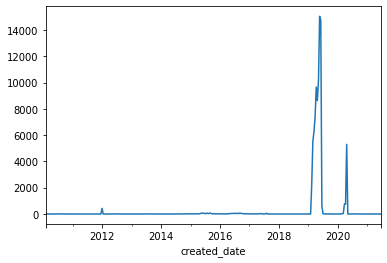

In [20]:
df[df.descriptor == 'Loud Music/Party'].resample('2W', on='created_date').size().plot()

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [21]:
# Used this to figure out where the bee complaints were:
# df.complaint_type.unique()
df[df.complaint_type.str.contains("Bee")]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_year
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE,19-03
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE,19-03
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,19-04
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,19-04
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE,19-04
466469,42291921,2019-04-23 11:39:59,2019-05-06 09:36:28,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11210,674 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,19-04
472431,42300656,2019-04-23 14:56:21,2019-05-06 09:37:30,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10037,2311 5 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,19-04
506112,42497797,2019-04-28 15:33:33,2019-05-13 11:10:45,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11385,2017 HARMAN STREET,ADDRESS,RIDGEWOOD,Closed,QUEENS,ONLINE,19-04
532844,42533095,2019-05-02 13:13:47,2019-05-13 11:10:47,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11419,107-14 125 STREET,ADDRESS,SOUTH RICHMOND HILL,Closed,QUEENS,ONLINE,19-05
547427,42549720,2019-05-02 12:45:50,2019-05-13 11:10:46,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10309,62 SHARROTTS ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,19-05


### What month do most of the complaints happen in? I'd like to see a graph.

<AxesSubplot:>

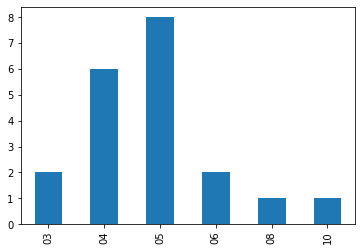

In [22]:
df[df.complaint_type.str.contains("Bee")].created_date.dt.strftime('%m').value_counts().sort_index().plot(kind='bar')

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [23]:
df[df.complaint_type=='Harboring Bees/Wasps'].descriptor.value_counts()

Bees/Wasps - Not a beekeper    12
Beekeeping - Honeybees          8
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [24]:
df.closed_date - df.created_date

0          16 days 15:27:04
1          14 days 15:00:26
2          29 days 21:26:32
3           6 days 14:38:16
4           6 days 16:18:23
                 ...       
4999995   205 days 18:38:00
4999996     0 days 23:37:41
4999997     4 days 22:42:05
4999998     4 days 21:18:00
4999999     3 days 13:52:02
Length: 5000000, dtype: timedelta64[ns]

Save it as a new column called `time_to_fix`

In [25]:
df['time_to_fix'] = df.closed_date - df.created_date

## Which agency has the best time-to-fix time?

In [26]:
df.groupby('agency').time_to_fix.mean().sort_values()

agency
NYPD    -1 days +14:17:54.596316368
3-1-1        0 days 00:00:53.400000
HRA       0 days 00:00:54.450134233
DHS       0 days 18:52:43.148271276
DORIS     3 days 20:56:12.698113207
DOF       4 days 11:26:19.417487715
DSNY      4 days 15:43:19.258418071
DOT       5 days 13:56:54.716883162
DEP       8 days 03:01:11.942908117
DOHMH     9 days 06:55:59.231246766
DFTA      9 days 19:11:32.515563101
DCA      10 days 08:02:23.123293561
HPD      11 days 09:24:39.561233556
DPR      13 days 12:46:37.923241332
NYCEM    15 days 17:23:06.328813559
DOITT    17 days 20:42:23.938271605
DOE      23 days 02:47:59.990291262
EDC      36 days 13:39:33.769953051
TLC      43 days 00:08:29.490604482
DOB      68 days 09:39:51.322973447
ACS                             NaT
COIB                            NaT
DCAS                            NaT
DCP                             NaT
DVS                             NaT
FDNY                            NaT
TAX                             NaT
Name: time_to_fix, dt

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [27]:
df.groupby('agency').time_to_fix.describe()

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
3-1-1,35,0 days 00:00:53.400000,0 days 00:01:29.568967840,0 days 00:00:03,0 days 00:00:20,0 days 00:00:36,0 days 00:00:47,0 days 00:07:44
ACS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
COIB,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCA,9303,10 days 08:02:23.123293561,32 days 18:31:59.099778623,0 days 00:13:47,1 days 00:29:17.500000,2 days 14:32:12,15 days 00:20:00.500000,555 days 00:30:36
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,235410,8 days 03:01:11.942908117,59 days 16:08:50.938074907,-1062 days +08:42:00,0 days 02:59:00,0 days 23:24:00,4 days 06:16:00,3562 days 03:17:00
DFTA,3534,9 days 19:11:32.515563101,6 days 02:05:40.511492686,0 days 00:37:46,3 days 23:34:29.250000,10 days 23:01:20.500000,13 days 23:23:49.500000,33 days 17:46:05
DHS,1504,0 days 18:52:43.148271276,15 days 09:15:34.032935557,0 days 00:00:04,0 days 00:26:53.250000,0 days 01:22:20,0 days 03:43:05.250000,561 days 00:34:39


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [28]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# also ran
# df.groupby('agency').time_to_fix.agg(['mean', 'size'])

,median,size
agency,,
3-1-1,0 days 00:00:36,35
ACS,NaT,123
COIB,NaT,4
DCA,2 days 14:32:12,9303
DCAS,NaT,280
DCP,NaT,9
DEP,0 days 22:55:00,238188
DFTA,10 days 23:01:20.500000,3534
DHS,0 days 01:18:55,1549


## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [29]:
df[df.agency == 'NYPD'].groupby('complaint_type').time_to_fix.median().sort_values()
# also tried looking at mean:
# df[df.agency == 'NYPD'].groupby('complaint_type').time_to_fix.mean().sort_values()

complaint_type
Homeless Street Condition            0 days 00:30:46
Non-Emergency Police Matter          0 days 00:41:19
Animal-Abuse                  0 days 00:43:31.500000
Abandoned Vehicle             0 days 00:45:53.500000
Illegal Fireworks             0 days 00:54:23.500000
Encampment                           0 days 01:23:34
Noise - Vehicle               0 days 01:34:31.500000
Traffic                              0 days 01:50:15
Noise - House of Worship      0 days 01:51:30.500000
Bike/Roller/Skate Chronic            0 days 01:52:32
Traffic/Illegal Parking              0 days 01:55:49
Noise - Street/Sidewalk       0 days 01:58:18.500000
Noise - Commercial                   0 days 01:59:16
Graffiti                             0 days 02:00:03
Noise - Park                         0 days 02:02:54
Urinating in Public           0 days 02:11:34.500000
Disorderly Youth                     0 days 02:14:01
Noise - Residential                  0 days 02:15:25
Panhandling                   0

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [30]:
pd.set_option("display.max_rows", 200)
df.groupby(['borough', 'agency']).time_to_fix.median()

borough        agency
BRONX          DCA              2 days 03:07:54
               DEP              0 days 20:02:30
               DFTA     12 days 00:59:43.500000
               DHS              0 days 01:19:56
               DOB             22 days 15:43:25
               DOE              3 days 13:54:09
               DOF              1 days 21:11:11
               DOHMH            2 days 00:00:00
               DOITT           14 days 15:53:27
               DOT              0 days 03:14:00
               DPR              2 days 19:12:46
               DSNY             1 days 05:14:00
               EDC             36 days 20:56:32
               HPD              5 days 00:00:00
               NYPD      0 days 03:20:08.500000
               TLC             42 days 03:37:40
BROOKLYN       3-1-1            0 days 00:00:41
               DCA              2 days 01:47:01
               DEP              0 days 17:58:00
               DFTA             9 days 06:52:11
               DHS

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [31]:
pivoted = df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
)

pivoted

# Another way I attempted this: with borough as the row and agency as the index
# df.pivot_table(
#     columns='agency',
#     index='borough',
#     values='time_to_fix',
#     aggfunc='median'
# )

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
3-1-1,NaT,0 days 00:00:41,0 days 00:00:28.500000,0 days 00:00:49.500000,NaT,0 days 00:00:07.500000
DCA,2 days 03:07:54,2 days 01:47:01,2 days 02:11:19,2 days 14:35:38,2 days 15:41:05.500000,2 days 21:53:44
DEP,0 days 20:02:30,0 days 17:58:00,1 days 21:14:00,0 days 20:31:00,0 days 18:55:00,0 days 04:57:00
DFTA,12 days 00:59:43.500000,9 days 06:52:11,10 days 20:59:03,11 days 05:25:42,10 days 21:04:10.500000,13 days 00:18:09
DHS,0 days 01:19:56,0 days 01:22:16,0 days 01:25:50.500000,0 days 01:12:28.500000,0 days 00:56:32.500000,NaT
DOB,22 days 15:43:25,11 days 07:35:48.500000,10 days 02:24:23,15 days 06:37:28,9 days 11:41:51.500000,0 days 21:32:19
DOE,3 days 13:54:09,2 days 17:25:50,4 days 00:58:57.500000,4 days 23:06:47,7 days 17:01:37,5 days 09:30:50
DOF,1 days 21:11:11,1 days 17:15:19.500000,1 days 18:51:53.500000,1 days 18:18:33,1 days 07:16:20,3 days 02:53:32
DOHMH,2 days 00:00:00,3 days 16:36:06.500000,2 days 14:51:47,4 days 00:00:00,6 days 00:00:00,NaT


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [32]:
# TLC is the worst in the Bronx
pivoted.sort_values('BRONX', ascending=False)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
TLC,42 days 03:37:40,36 days 13:14:16,40 days 02:21:23,28 days 14:33:05,40 days 11:23:59,0 days 00:00:34.500000
EDC,36 days 20:56:32,20 days 20:00:11,18 days 20:13:39,16 days 03:18:56.500000,23 days 20:47:46,NaT
DOB,22 days 15:43:25,11 days 07:35:48.500000,10 days 02:24:23,15 days 06:37:28,9 days 11:41:51.500000,0 days 21:32:19
DOITT,14 days 15:53:27,13 days 21:53:22,14 days 17:30:55,16 days 00:37:46.500000,17 days 21:47:06,165 days 00:01:33
DFTA,12 days 00:59:43.500000,9 days 06:52:11,10 days 20:59:03,11 days 05:25:42,10 days 21:04:10.500000,13 days 00:18:09
HPD,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00
DOE,3 days 13:54:09,2 days 17:25:50,4 days 00:58:57.500000,4 days 23:06:47,7 days 17:01:37,5 days 09:30:50
DPR,2 days 19:12:46,2 days 05:36:32.500000,3 days 23:25:42,2 days 22:57:29,1 days 23:00:24.500000,2 days 20:39:42
DCA,2 days 03:07:54,2 days 01:47:01,2 days 02:11:19,2 days 14:35:38,2 days 15:41:05.500000,2 days 21:53:44


In [33]:
# TLC is the worst in Staten Island too
pivoted.sort_values('STATEN ISLAND', ascending=False)

# EDC takes 16 days longer in the Bronx to resolve a complaint than elsewhere
# DOB responses are also slower in the Bronx

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
TLC,42 days 03:37:40,36 days 13:14:16,40 days 02:21:23,28 days 14:33:05,40 days 11:23:59,0 days 00:00:34.500000
EDC,36 days 20:56:32,20 days 20:00:11,18 days 20:13:39,16 days 03:18:56.500000,23 days 20:47:46,NaT
DOITT,14 days 15:53:27,13 days 21:53:22,14 days 17:30:55,16 days 00:37:46.500000,17 days 21:47:06,165 days 00:01:33
DFTA,12 days 00:59:43.500000,9 days 06:52:11,10 days 20:59:03,11 days 05:25:42,10 days 21:04:10.500000,13 days 00:18:09
DOB,22 days 15:43:25,11 days 07:35:48.500000,10 days 02:24:23,15 days 06:37:28,9 days 11:41:51.500000,0 days 21:32:19
DOE,3 days 13:54:09,2 days 17:25:50,4 days 00:58:57.500000,4 days 23:06:47,7 days 17:01:37,5 days 09:30:50
HPD,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00
DOHMH,2 days 00:00:00,3 days 16:36:06.500000,2 days 14:51:47,4 days 00:00:00,6 days 00:00:00,NaT
DCA,2 days 03:07:54,2 days 01:47:01,2 days 02:11:19,2 days 14:35:38,2 days 15:41:05.500000,2 days 21:53:44


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [34]:
df[(df.created_date >= '2020-11-25') & (df.created_date < '2020-11-26')]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_year,time_to_fix
2124576,48243369,2020-11-25 12:00:00,2020-11-27 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11236,NaN,INTERSECTION,BROOKLYN,Closed,BROOKLYN,PHONE,20-11,2 days
2125606,48246449,2020-11-25 12:00:00,2020-11-27 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,10033,555 WEST 182 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,20-11,2 days
2125613,48246460,2020-11-25 12:00:00,2020-11-27 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11235,2407 EAST 11 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,20-11,2 days
2125678,48248244,2020-11-25 12:00:00,2020-11-25 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,10452,1455 GRAND CONCOURSE,ADDRESS,BRONX,Closed,BRONX,PHONE,20-11,0 days
2125755,48248564,2020-11-25 12:00:00,2020-11-27 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11225,1317 UNION STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,20-11,2 days
2125757,48249240,2020-11-25 12:00:00,2020-11-25 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,10472,2051 CHATTERTON AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,20-11,0 days
2125811,48250441,2020-11-25 12:00:00,2020-11-27 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11427,86-15 208 STREET,ADDRESS,Queens Village,Closed,QUEENS,PHONE,20-11,2 days
2125860,48251444,2020-11-25 12:00:00,2020-12-10 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,10305,35 LANGERE PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,20-11,15 days
2126032,48252310,2020-11-25 12:00:00,2020-11-27 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11206,356A VERNON AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,20-11,2 days


In [35]:
df[(df.created_date >= '2020-11-24') & (df.created_date < '2020-11-25')]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_year,time_to_fix
1321032,48246093,2020-11-24 16:09:00,2020-11-25 12:00:00,DSNY,Department of Sanitation,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,10468.0,2849 WEBB AVENUE,ADDRESS,BRONX,Closed,BRONX,ONLINE,20-11,0 days 19:51:00
2124424,48239214,2020-11-24 12:00:00,2020-12-04 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11434,168-19 119 AVENUE,ADDRESS,Jamaica,Closed,QUEENS,PHONE,20-11,10 days 00:00:00
2124439,48240229,2020-11-24 12:00:00,2020-11-24 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11234,AVENUE J,BLOCKFACE,BROOKLYN,Open,BROOKLYN,PHONE,20-11,0 days 00:00:00
2124551,48240232,2020-11-24 12:00:00,2020-11-25 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,10473,315 BOLTON AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,20-11,1 days 00:00:00
2125235,48244295,2020-11-24 12:00:00,2020-11-24 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11419,95-22 109 STREET,ADDRESS,South Richmond Hill,Closed,QUEENS,PHONE,20-11,0 days 00:00:00


## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [36]:
df[df.created_date.dt.strftime('%m-%d') == '12-25' ].complaint_type.value_counts()

HEATING                                    2609
HEAT/HOT WATER                              667
Street Condition                            403
PLUMBING                                    274
GENERAL CONSTRUCTION                        232
PAINT - PLASTER                             177
Traffic Signal Condition                    134
Dirty Conditions                            110
ELECTRIC                                    105
NONCONST                                     98
Street Light Condition                       68
Elevator                                     62
Sanitation Condition                         56
Missed Collection (All Materials)            55
Benefit Card Replacement                     45
Water System                                 40
UNSANITARY CONDITION                         39
Sewer                                        35
General Construction/Plumbing                30
Derelict Vehicles                            25
WATER LEAK                              

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [37]:
# look at only fireworks
firework_df = df[df.complaint_type == 'Illegal Fireworks']
firework_df.tail()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_year,time_to_fix
4419241,46051492,2020-04-23 19:37:52,2020-04-23 19:50:37,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11231,87 2 STREET,NaN,BROOKLYN,Closed,BROOKLYN,ONLINE,20-04,0 days 00:12:45
4758758,46064370,2020-04-25 13:55:33,2020-04-25 14:06:26,NYPD,New York City Police Department,Illegal Fireworks,NaN,Residential Building/House,11249.0,400 WYTHE AVENUE,NaN,BROOKLYN,Closed,BROOKLYN,ONLINE,20-04,0 days 00:10:53
4765293,46064338,2020-04-25 20:32:26,2020-04-25 20:46:12,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11368.0,110-07 CORONA AVENUE,NaN,CORONA,Closed,QUEENS,ONLINE,20-04,0 days 00:13:46
4766241,46063476,2020-04-25 23:12:52,2020-04-25 23:49:40,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,10040.0,1 ARDEN STREET,NaN,NEW YORK,Closed,MANHATTAN,ONLINE,20-04,0 days 00:36:48
4992772,28400773,2014-07-03 22:00:09,2014-07-03 23:57:19,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,10027.0,NaN,INTERSECTION,NEW YORK,Closed,MANHATTAN,PHONE,14-07,0 days 01:57:10


In [38]:
# number of firework complaints during BLM protests during summer, divided by total number of firework complaints
# This returns 0 because the reports I found for fireworks didn't go past June 2020
# Tested that by returning tail above and running this: 
# firework_df[(firework_df.created_date > '2020-06-01')] -> which returns no rows
len(firework_df[(firework_df.created_date >= '2020-06-01') & (firework_df.created_date < '2020-09-01')]) \
/ len(firework_df)

0.0

<AxesSubplot:xlabel='created_date'>

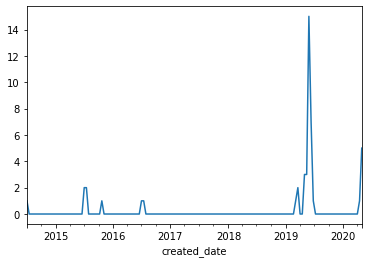

In [39]:
# plot number of fireworks each month
firework_df.resample('2W', on='created_date').size().plot()

### Assumptions and limitations:
We're assuming that Black Lives Matter protests are the only reason that fireworks would have been used during that summer -- which is false, since summer 2020 also included Independence Day, where fireworks are common. This analysis might stand if we were focusing on specific addresses and timeframes where protests were known to have been taking place. But on this broad scope we have currently (borough, city and even the zipcode level feel much too broad to me), I do not think this analysis would stand at all.

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

In [40]:
# Filter DSNY into its own dataset
dsny_df = df[df.agency == 'DSNY']

<AxesSubplot:xlabel='created_date'>

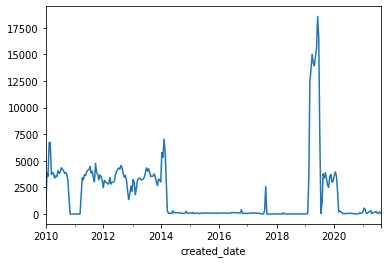

In [41]:
# Number of complaints over time
dsny_df.resample('2W', on='created_date').size().plot()

In [42]:
# Number of complaints in each borough
dsny_df.groupby('borough').size().sort_values(ascending=False)
# Also looked at number of complaints in each city: 
# df.groupby('city').size().sort_values(ascending=False)

borough
BROOKLYN         196363
QUEENS           177725
MANHATTAN         65200
STATEN ISLAND     64886
BRONX             60376
Unspecified         372
dtype: int64

<AxesSubplot:xlabel='created_date'>

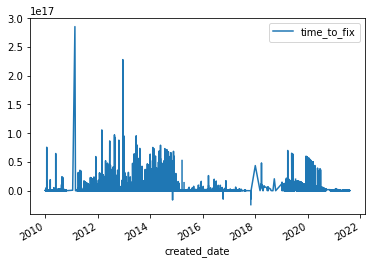

In [43]:
# Time to fix over time
dsny_df.plot(x='created_date', y='time_to_fix')

In [44]:
# Average time to fix over time in boroughs
dsny_df.groupby('borough').time_to_fix.mean().sort_values(ascending=False)

borough
BROOKLYN        5 days 12:14:09.634910332
MANHATTAN       4 days 11:01:29.217927568
BRONX           4 days 10:02:59.284045655
QUEENS          4 days 06:25:52.449248300
STATEN ISLAND   3 days 13:30:56.515891251
Unspecified     3 days 08:11:56.290322580
Name: time_to_fix, dtype: timedelta64[ns]

In [45]:
# Average time to fix over time total
dsny_df.time_to_fix.mean()

Timedelta('4 days 15:43:19.258418071')

In [46]:
# Create dataframes to look specifically at the slowdown times versus before slowdown times
# I ran these to show what I *would* do -- but unfortunately the slowdown dates all returned NAs (the code should be
# working, as I did use it above. But I couldn't really figure out how to pull the data that included this, so
# to be entirely honest, I'm not confident in whether there's actually no data or if I just did something wrong here)
slowdown_df = dsny_df[(dsny_df.created_date >= '2021-08-20') & (dsny_df.created_date < '2021-09-01')]

In [47]:
# Complaints in NYC -- DURING SLOWDOWN AND OVERALL
print('Overall')
print(dsny_df.time_to_fix.mean())
print('Slowdown')
print(slowdown_df.time_to_fix.mean())

Overall
4 days 15:43:19.258418071
Slowdown
NaT


In [59]:
# Complaints in Maine Park (Zip code 11234) -- OVERALL
dsny_df[dsny_df.incident_zip.isin(['11234'])].created_date.dt.strftime('%y-%m').value_counts().head(10)

19-04    502
19-05    237
12-06    167
19-03    134
13-07    132
19-02    128
12-05    117
11-08    114
11-04    111
13-08     99
Name: created_date, dtype: int64

In [60]:
# Complaints in Maine Park (Zip code 11234) -- SLOWDOWN
slowdown_df[slowdown_df.incident_zip.isin(['11234'])].created_date.dt.strftime('%y-%m').value_counts().head(10)

Series([], Name: created_date, dtype: int64)

In [50]:
# Average time to fix over time in Maine Park -- DURING SLOWDOWN AND OVERALL
print('Overall')
print(dsny_df[dsny_df.incident_zip.isin(['11234'])].time_to_fix.mean())
print('Slowdown')
print(slowdown_df[slowdown_df.incident_zip.isin(['11234'])].time_to_fix.mean())

Overall
5 days 22:55:30.038076152
Slowdown
NaT


In [61]:
# Complaints in Canarsie (Zip code 11236) -- OVERALL
dsny_df[dsny_df.incident_zip.isin(['11236'])].created_date.dt.strftime('%y-%m').value_counts().head(10)

19-04    485
19-05    240
12-06    153
19-03    151
19-02    136
13-07    130
11-08    121
13-08    117
11-05    113
11-07    107
Name: created_date, dtype: int64

In [62]:
# Complaints in Canarsie (Zip code 11236) -- SLOWDOWN
slowdown_df[slowdown_df.incident_zip.isin(['11236'])].created_date.dt.strftime('%y-%m').value_counts().head(10)

Series([], Name: created_date, dtype: int64)

In [53]:
# Average time to fix over time in Canarsie -- DURING SLOWDOWN AND OVERALL
print('Overall')
print(dsny_df[dsny_df.incident_zip.isin(['11236'])].time_to_fix.mean())
print('Slowdown')
print(slowdown_df[slowdown_df.incident_zip.isin(['11236'])].time_to_fix.mean())

Overall
5 days 19:35:26.853057199
Slowdown
NaT


### Assumptions and Limitations:
Overall times in Canarsie and Maine Park were just 5 days (only one day more than the NY average). Unfortunately, as noted above, I couldn't figure out how to pull the data for the specific time of the slowdown. But in any case, additional research is needed on all of these areas, because any differences might not be related to the pandemic-related slowdown. This analysis assumes that complaints are an accurate representation of reality, which they might not be. For example, maybe people in an area where there were more complaints during the slowdown than before just complain more.

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

In [54]:
# I sourced from here: https://www.rentcafe.com/blog/rental-market/real-estate-news/top-20-gentrified-zip-codes/
# and looked @ Brooklyn zip codes: 11211 11222 11216 11237 11221
# Manhattan zip codes: 10039 10026

# List of zipcodes
brooklyn_zips = ['11211', '11222', '11216', '11237', '11221']
manhattan_zips = ['10039', '10026']
all_zips = ['11211', '11222', '11216', '11237', '11221', '10039', '10026']

In [63]:
# Number of complaints over time in all these NY zips
df[df.incident_zip.isin(all_zips)].created_date.dt.strftime('%y-%m').value_counts().sort_index()

10-01       11
10-02        4
10-03        7
10-04       10
10-05        4
10-06        4
10-07       28
10-08        9
10-09       22
10-10       12
10-11       27
10-12       49
11-01       76
11-02       58
11-03     1698
11-04     5341
11-05     4776
11-06     2719
11-07     3512
11-08     5719
11-09     2490
11-10     1684
11-11     6268
11-12     3692
12-01       11
12-02     2232
12-03     1638
12-04     2600
12-05     3571
12-06     3536
12-07     1931
12-08     2013
12-09     1913
12-10     2182
12-11     4701
12-12     1699
13-01     4834
13-02       11
13-03       17
13-04       34
13-05       20
13-06      246
13-07     3524
13-08     3308
13-09     3279
13-10     1934
13-11       28
13-12       39
14-01      152
14-02     1362
14-03     1222
14-04      207
14-05       27
14-06       27
14-07       25
14-08       16
14-09       39
14-10       33
14-11       30
14-12      130
15-01       83
15-02      101
15-03      132
15-04      113
15-05      107
15-06      112
15-07     

<AxesSubplot:>

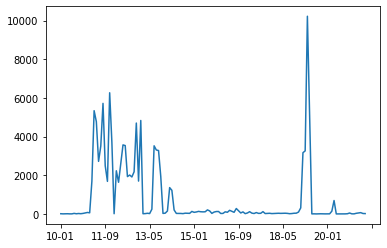

In [65]:
# Number of complaints over time in NY zips - plot
df[df.incident_zip.isin(all_zips)].created_date.dt.strftime('%y-%m').value_counts().sort_index().plot(kind='line')

In [75]:
# Number of complaints over time in Brooklyn zips
df[df.incident_zip.isin(brooklyn_zips)].created_date.dt.strftime('%y-%m').value_counts().sort_index()

10-01      11
10-02       4
10-03       5
10-04       8
10-05       4
10-06       4
10-07      28
10-08       8
10-09      22
10-10       8
10-11      14
10-12      28
11-01      61
11-02      35
11-03    1503
11-04    4690
11-05    4140
11-06    2372
11-07    3150
11-08    5036
11-09    2179
11-10    1411
11-11    5503
11-12    3186
12-01      11
12-02    1886
12-03    1414
12-04    2209
12-05    3134
12-06    3086
12-07    1748
12-08    1857
12-09    1669
12-10    1903
12-11    3961
12-12    1411
13-01    3936
13-02      11
13-03      15
13-04      27
13-05      17
13-06     228
13-07    3053
13-08    3018
13-09    2815
13-10    1724
13-11      19
13-12      25
14-01     135
14-02    1138
14-03    1051
14-04     197
14-05      26
14-06      24
14-07      23
14-08      15
14-09      33
14-10      32
14-11      26
14-12     110
15-01      75
15-02      88
15-03     111
15-04      87
15-05      83
15-06     101
15-07     170
15-08     102
15-09      25
15-10      85
15-11      93
15-12 

<AxesSubplot:>

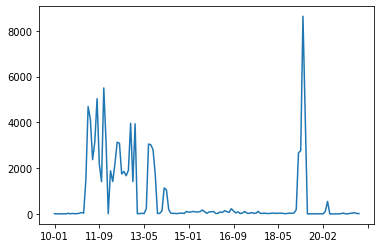

In [67]:
# Number of complaints over time in Brooklyn zips - plot
df[df.incident_zip.isin(brooklyn_zips)].created_date.dt.strftime('%y-%m').value_counts().sort_index().plot(kind='line')

In [74]:
# Number of complaints over time in Manhattan zips
df[df.incident_zip.isin(manhattan_zips)].created_date.dt.strftime('%y-%m').value_counts().sort_index()

10-03       2
10-04       2
10-08       1
10-10       4
10-11      13
10-12      21
11-01      15
11-02      23
11-03     195
11-04     651
11-05     636
11-06     347
11-07     362
11-08     683
11-09     311
11-10     273
11-11     765
11-12     506
12-02     346
12-03     224
12-04     391
12-05     437
12-06     450
12-07     183
12-08     156
12-09     244
12-10     279
12-11     740
12-12     288
13-01     898
13-03       2
13-04       7
13-05       3
13-06      18
13-07     471
13-08     290
13-09     464
13-10     210
13-11       9
13-12      14
14-01      17
14-02     224
14-03     171
14-04      10
14-05       1
14-06       3
14-07       2
14-08       1
14-09       6
14-10       1
14-11       4
14-12      20
15-01       8
15-02      13
15-03      21
15-04      26
15-05      24
15-06      11
15-07      39
15-08      55
15-09       3
15-10      12
15-11      31
15-12      17
16-01       1
16-02       1
16-03      20
16-04      22
16-05      45
16-06      34
16-07      19
16-08 

<AxesSubplot:>

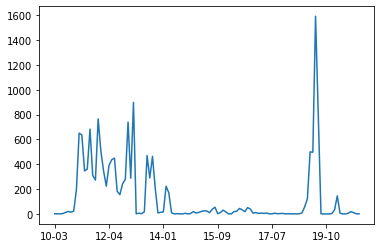

In [69]:
# Number of complaints over time in Brooklyn - plot
df[df.incident_zip.isin(manhattan_zips)].created_date.dt.strftime('%y-%m').value_counts().sort_index().plot(kind='line')

### Assumptions and limitations:
We're assuming here that the people who make the complaints are the people who are moving in, when in actuality it might be the people who previously lived there filing complaints against the new residents moving in. Because gentrification also doesn't happen in a confined time frame, it is extremely difficult to attribute any rises in complaints to gentrification. Since gentrification can take place over the course of even up to a decade, we have no 'before' point to compare the current amount of complaints to.

Any narrative in this 'data story' would require deeper context beyond the data. For example, complaints might have gone up because of a continued construction project. IF this construction project is one of many, since the area is gentrifying -- then the complaints could be linked to gentrification. Or with reporting where people say that newcomers to an area have been filing a specific type of complaint, we could link that to gentrification.

Also, it would be worth looking at different metrics for measuring gentrification (rising house prices, increased numbers of businesses, more construction projects, etc.) and using those to do our own analysis to find gentrifying zip codes, instead of an outside source like the one I used

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

In [70]:
# Look at channel types for requests
df.open_data_channel_type.value_counts()

UNKNOWN    2342735
PHONE      1873407
ONLINE      567370
MOBILE      146719
OTHER        69769
Name: open_data_channel_type, dtype: int64

In [71]:
# Look only at mobile
mobile_df = df[df.open_data_channel_type == 'MOBILE']

In [80]:
# Search for missing dates in the mobile dataset -- I tried this and am not sure if it worked, but am 
# leaving it here nonetheless
missingdates = pd.date_range(start="2010-06-01", end="2021-08-01").difference(mobile_df.created_date)
len(missingdates)

3886

In [81]:
missingdates

DatetimeIndex(['2010-06-01', '2010-06-02', '2010-06-03', '2010-06-04',
               '2010-06-05', '2010-06-06', '2010-06-07', '2010-06-08',
               '2010-06-09', '2010-06-10',
               ...
               '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01'],
              dtype='datetime64[ns]', length=3886, freq=None)

### Assumptions and limitations:
Here, I was able to count the number of dates where there were no mobile requests. Some of these -- especially those that were prolonged -- might signify 311 mobile app outages. However, we do need to confirm that they were in fact outages, as opposed to planned maintenance or just no one submitting a complaint. Reporting would probably be the best way of doing this, though a helpful data approach might be first counting the longest consecutive stretch of time in the "missingdates" list where there were no complaints.

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)

This dataset doesn't contain any information about federal funds or a lack of them. If we wanted to use this dataset, we could, however, search for the addresses of public housing units in this dataset. We could look at number of complaints about infrastructure over time, as well as individual complaints to see some of the problems that NYC public housing infrastructure is facing. And then we could bring in external data about federal funds for these housing projects to see whether there is a lack of funding that might potentially correspond with an increase in complaints (which signify an increase in infrastructure issues).